## Time Series

Iniciando os estudos usando a biblioteca Datatime

In [62]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Retornando data e hora atual

In [2]:
print(datetime.datetime.now())

2023-05-23 23:16:16.383151


### TimeDelta

In [3]:
# Retornando timedelta - que seria o intervalo de tempo entre duas variaveis de tempo
antes = datetime.datetime.now()

In [4]:
depois = datetime.datetime.now()

In [6]:
# O intervalo dos tempos é de 22 sec
depois-antes

datetime.timedelta(seconds=22, microseconds=959135)

### String para data hora (Strptime)

Passando uma string para data e hora

In [8]:
# Criando a string
str_data_hora = '09/17/20 13:26:35'
str_data_hora

'09/17/20 13:26:35'

In [12]:
# Convertendo a string
convert_datetime = datetime.datetime.strptime(str_data_hora, '%m/%d/%y %H:%M:%S')

In [17]:
# Visualizando
print(convert_datetime)

2020-09-17 13:26:35


### String para Data

In [19]:
# String
str_data = '17/09/2023'

In [24]:
# Convertendo para datetime - necessário o .date() no final
data = datetime.datetime.strptime(str_data, '%d/%m/%Y').date()

In [25]:
# Visualização
print(data)

2023-09-17


### Conversão de String para tempo (Strptime)

In [29]:
# String
str_hora = '13:26:35'

In [31]:
# Convertendo para datetime - necessário o .time() no final
hora = datetime.datetime.strptime(str_hora, '%H:%M:%S').time()

In [32]:
# Visualização
print(hora)

13:26:35


### Períodos de Tempo (Frequência)  - String for time

In [146]:
# Criando strings
start = '2022/01/01'
end = '2022/12/31'

In [163]:
# Importando o locale para converter para portugues
import locale
locale.setlocale(locale.LC_ALL, 'pt-BR.UTF-8')

'pt-BR.UTF-8'

In [148]:
# Gerando um range de datas tendo inicio e fim com uma frequencia
x = pd.date_range(start, end, freq='M').strftime('%m-%d-%Y')  # Usando a função para modificar
x                                                                  # o formato 

Index(['01-31-2022', '02-28-2022', '03-31-2022', '04-30-2022', '05-31-2022',
       '06-30-2022', '07-31-2022', '08-31-2022', '09-30-2022', '10-31-2022',
       '11-30-2022', '12-31-2022'],
      dtype='object')

### Plot

In [149]:
# Criando uma sequencia de valores para usar no gráfico
y = np.random.normal(10, 1, 12) # 12 elementos | com média 10 | desvio padrão 1
y

array([ 9.68524185,  8.9140976 ,  9.26753801,  8.78747687, 12.08711336,
       10.16444123, 11.15020554,  8.73264795, 10.18103513, 11.17786194,
        9.66498924, 11.03111446])

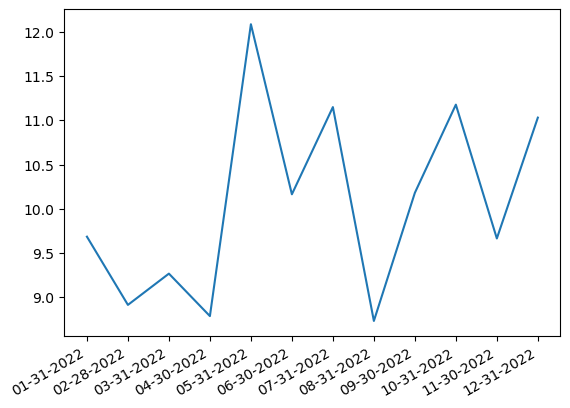

In [150]:
# Formatando o gráfico para receber valores de datetime
f, ax= plt.subplots(dpi=100)
ax.plot(x, y)  # Usando as datas com os valores gerados randomicamentes
f.autofmt_xdate()  # Função formata os meses de forma que não fique embolado
plt.show()

### Dataframe 

In [151]:
# Criando um dataframe a partir dos valores anteriores
data = pd.DataFrame({'Datas': x, 'Valores': y})

In [152]:
data

,Datas,Valores
0,01-31-2022,9.685242
1,02-28-2022,8.914098
2,03-31-2022,9.267538
3,04-30-2022,8.787477
4,05-31-2022,12.087113
5,06-30-2022,10.164441
6,07-31-2022,11.150206
7,08-31-2022,8.732648
8,09-30-2022,10.181035
9,10-31-2022,11.177862


### Index de Datas (DatatimeIndex)

In [153]:
# Visualizando que as datas estão no formato objeto sendo necessário converter
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Datas    12 non-null     object 
 1   Valores  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [154]:
# convertendo a coluna datas para datetime
data['Datas'] = pd.DatetimeIndex(data['Datas'])

In [155]:
# Visualizando conversão
data['Datas']

0    2022-01-31
1    2022-02-28
2    2022-03-31
3    2022-04-30
4    2022-05-31
5    2022-06-30
6    2022-07-31
7    2022-08-31
8    2022-09-30
9    2022-10-31
10   2022-11-30
11   2022-12-31
Name: Datas, dtype: datetime64[ns]

In [159]:
# Convertendo coluna Datas em index
data.set_index('Datas', inplace=True)

In [160]:
# Criando uma coluna com valores irregulares 
data['Data String'] = data.index.strftime('%d/%b/%y')

In [161]:
# Visualizando a nova coluna
data

,Valores,Data String
Datas,,
2022-01-31,9.685242,31/jan/22
2022-02-28,8.914098,28/fev/22
2022-03-31,9.267538,31/mar/22
2022-04-30,8.787477,30/abr/22
2022-05-31,12.087113,31/mai/22
2022-06-30,10.164441,30/jun/22
2022-07-31,11.150206,31/jul/22
2022-08-31,8.732648,31/ago/22
2022-09-30,10.181035,30/set/22


In [164]:
# Convertendo a coluna para datetime novamente usando o pandas e passando o formato dos valores
data['Data String'] = pd.to_datetime(data['Data String'], format='%d/%b/%y')

In [166]:
# Visualizando
data['Data String']

Datas
2022-01-31   2022-01-31
2022-02-28   2022-02-28
2022-03-31   2022-03-31
2022-04-30   2022-04-30
2022-05-31   2022-05-31
2022-06-30   2022-06-30
2022-07-31   2022-07-31
2022-08-31   2022-08-31
2022-09-30   2022-09-30
2022-10-31   2022-10-31
2022-11-30   2022-11-30
2022-12-31   2022-12-31
Name: Data String, dtype: datetime64[ns]